## Praca domowa 1 - ekspolarcja danych
### Paweł Fijałkowski, Inżynieria i analiza danych
#### Wstęp do uczenia maszynowego 

In [8]:
import pandas as pd
import numpy as np
import ssl
import matplotlib.pyplot as plt 
ssl._create_default_https_context = ssl._create_unverified_context

In [6]:
df = pd.read_csv("forest_fires_dataset.csv")
correct_order = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']

In [37]:
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33.0,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33.0,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99.0,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32.0,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71.0,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70.0,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42.0,4.0,0.0,0.00


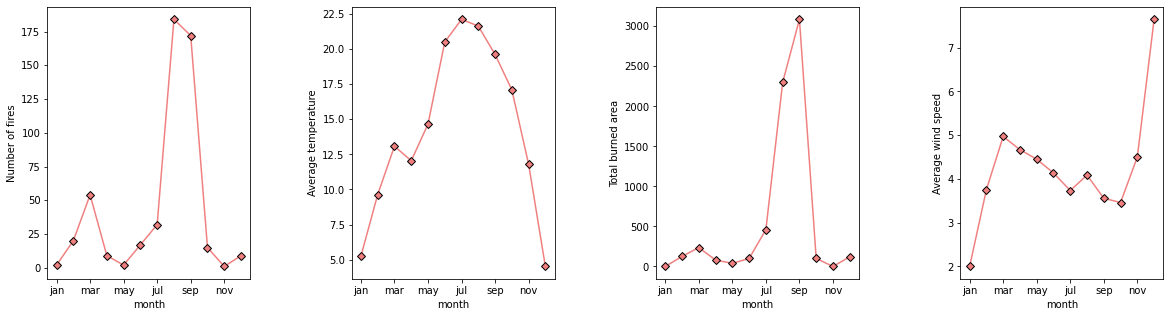

In [78]:
# Intuicyjna analiza zmiennych bedących głownymi czynnikami występowania pożarów w lasach (temperatura,wiatr,deszcze)
fig, axes = plt.subplots(1, 4, figsize=(20,5), squeeze=False)
grouped_by_month = df.groupby("month")
grouped_by_month.size().reindex(correct_order).plot(ax=axes[0, 0],ylabel="Number of fires",color='lightcoral', marker='D', markeredgecolor='black')
grouped_by_month.mean()["temp"].reindex(correct_order).plot(ax=axes[0, 1],ylabel="Average temperature",color='lightcoral', marker='D', markeredgecolor='black')
grouped_by_month.sum()["area"].reindex(correct_order).plot(ax=axes[0, 2],ylabel="Total burned area",color='lightcoral', marker='D', markeredgecolor='black')
grouped_by_month.mean()["wind"].reindex(correct_order).plot(ax=axes[0, 3],ylabel="Average wind speed",color='lightcoral', marker='D', markeredgecolor='black')
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

In [100]:
linear_correlation_matrix = abs(df.corr(method="pearson"))
linear_correlation_matrix   

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,0.021039,0.048384,0.085916,0.006210,0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,0.046308,0.007782,0.101178,0.024488,0.024103,0.062221,0.020341,0.033234,0.044873
FFMC,0.021039,0.046308,1.000000,0.382619,0.330512,0.531805,0.431532,0.300995,0.028485,0.056702,0.040122
DMC,0.048384,0.007782,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,0.105342,0.074790,0.072994
DC,0.085916,0.101178,0.330512,0.682192,1.000000,0.229154,0.496208,0.039192,0.203466,0.035861,0.049383
ISI,0.006210,0.024488,0.531805,0.305128,0.229154,1.000000,0.394287,0.132517,0.106826,0.067668,0.008258
temp,0.051258,0.024103,0.431532,0.469594,0.496208,0.394287,1.000000,0.527390,0.227116,0.069491,0.097844
RH,0.085223,0.062221,0.300995,0.073795,0.039192,0.132517,0.527390,1.000000,0.069410,0.099751,0.075519
wind,0.018798,0.020341,0.028485,0.105342,0.203466,0.106826,0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.065387,0.033234,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,0.007366


In [99]:
for i in range(len(linear_correlation_matrix)):
    linear_correlation_matrix.iloc[i,i] = 0
biggest_correalations = linear_correlation_matrix.idxmax()
values = linear_correlation_matrix.max()
pd.DataFrame([biggest_correalations,values])
# możemy zauważyć wysoką pearsonowską korelację pomiędzy parami zmiennych: 
# DC oraz DMC, X oraz Y, ISI oraz FFMC, temp oraz RH

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,Y,X,ISI,DC,DMC,FFMC,RH,temp,temp,RH,temp
1,0.539548,0.539548,0.531805,0.682192,0.682192,0.531805,0.52739,0.52739,0.227116,0.0997512,0.0978441


In [205]:
def makeCorrelationplot(xcol,ycol,df,toPaint):
    df.plot(x=xcol,y=ycol,kind="scatter",color='lightcoral', marker='D',ax=toPaint)
    xvec = df[xcol]
    yvec = df[ycol]
    m, b = np.polyfit(xvec, yvec, 1)
    toPaint.plot(xvec,m*xvec+b,ls='-')   

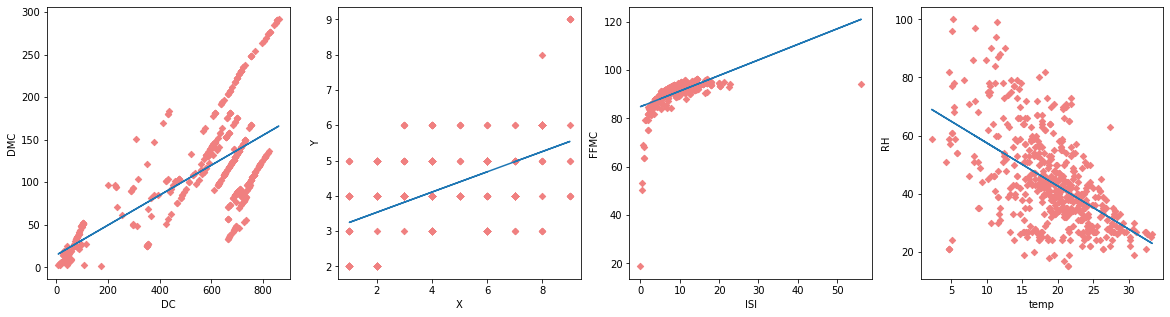

In [206]:
fig2, ax = plt.subplots(1, 4, figsize=(20,5), squeeze=False)
makeCorrelationplot("DC","DMC",df,ax[0,0])
makeCorrelationplot("X","Y",df,ax[0,1])
makeCorrelationplot("ISI","FFMC",df,ax[0,2])
makeCorrelationplot("temp","RH",df,ax[0,3])
plt.show()